In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G, c, M_sun
G = G.cgs.value
c = c.cgs.value
M_sun = M_sun.cgs.value
Mpc = 3.085677581e+24

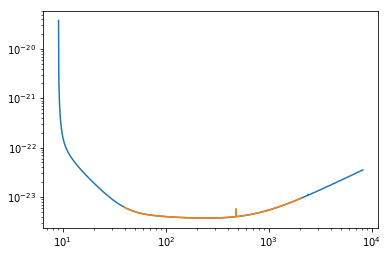

In [85]:
# load PSD
file_psd= "data/PSDs/ZERO_DET_high_P.txt"
data_psd = np.genfromtxt(file_psd)
N = 10000
f = np.linspace(40.0, 2048.0, N, endpoint=True)
df = abs(f[1]-f[0])
psd = np.interp(f, data_psd[:,0], data_psd[:,1])

plt.figure()
plt.loglog(data_psd[:,0], data_psd[:,1])
plt.loglog(f, psd)
plt.show()

## How large is SNR expected?

The waveform is
$$ \tilde{h}(f) = \frac{A}{D}f^{-7/6}e^{-i\Psi(f)} = \left(\frac{5}{24}\right)^{1/2} \frac{G^{5/6} \mathcal{M}_c^{5/6}}{\pi^{2/3} c^{3/2}}\frac{1}{D} f^{-7/6}e^{-i\Psi(f)}.$$

The expected SNR is
$$\rho = \left( 4\int df \frac{|\tilde{h}(f)|^2}{S_n(f)} \right)^{1/2},$$
thus the horizon distance is
$$ D_\text{hor} = \frac{2A}{\rho} \left( \int df \frac{f^{-7/3}}{S_n(f)} \right)^{1/2}$$.

In [86]:
integral = np.sum(f**(-7.0/3.0) / (psd**2.0)) * df

In [87]:
list_Mc = [1.0e-3, 1.0e-2, 0.1, 1.0, 10.0, 100.0]
list_dist = []

for Mc in list_Mc:
    A = np.sqrt(5.0/24) * (G*Mc*M_sun)**(5.0/6.0) / (np.pi**(2.0/3.0)) / (c**1.5)
    dist = np.sqrt(2) * A / 8.0 * np.sqrt(integral) / Mpc
    list_dist.append(dist)


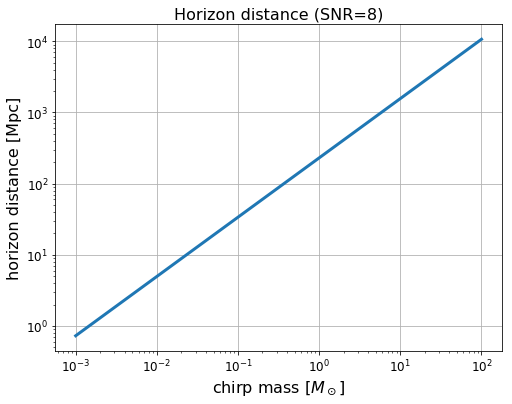

In [89]:
plt.figure(figsize=(8,6))
plt.loglog(list_Mc, list_dist, lw=3, markersize=10)
plt.xlabel(r'chirp mass $[M_\odot]$', fontsize=16)
plt.ylabel('horizon distance [Mpc]', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Horizon distance (SNR=8)', fontsize=16)
plt.grid()
plt.savefig('figure/HorisonDistance.pdf')
plt.show()

## How long will the signal from BBH be continued?

The frequency derivative is
$$ \frac{df}{dt} = \frac{96}{5}\pi^{8/3} \left( \frac{G \mathcal{M}_c}{c^3} \right)^{5/3} f^{11/3}. $$

Integrating this, we get
$$ T_\text{dur} = \frac{5}{256}\pi^{-8/3} \left( \frac{c^3}{G \mathcal{M}_c} \right)^{5/3} (f_\text{min}^{-8/3} - f_\text{max}^{-8/3} ) $$

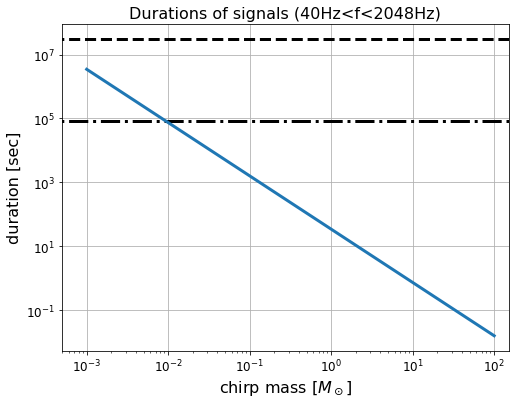

In [90]:
fmin = 40.0
fmax = 2048.0

list_dur = []
for Mc in list_Mc:
    Tdur = 5.0/256.0 * (np.pi**(-8.0/3.0)) * (c**3.0 / (G*Mc*M_sun))**(5.0/3.0) * (fmin**(-8.0/3.0) - fmax**(-8.0/3.0))
    list_dur.append(Tdur)
    
plt.figure(figsize=(8,6))
plt.loglog(list_Mc, list_dur, lw=3)
plt.xlabel(r'chirp mass $[M_\odot]$', fontsize=16)
plt.ylabel('duration [sec]', fontsize=16)
plt.hlines(3.0e+7, 1.0e-4, 500, linestyle='--', lw=3)
plt.hlines(8.64e+4, 1.0e-4, 500, linestyle='-.', lw=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([5.0e-4, 1.5e+2])
plt.title('Durations of signals (40Hz<f<2048Hz)', fontsize=16)
plt.grid()
plt.savefig('Duration.pdf')
plt.show()